In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import io
import requests

%matplotlib inline

In [ ]:
## DEPRICATED

# from pathlib import Path
# from google.colab import drive
# drive.mount('/content/drive')

# import os, shutil, pathlib, fnmatch

# def move_dir(src: str, dst: str):
#     print('hello')
#     pattern = '*io_train.csv'
#     # pattern = '*.csv'
#     if not os.path.isdir(dst):
#         pathlib.Path(dst).mkdir(parents=True, exist_ok=True)
#     for f in fnmatch.filter(os.listdir(src), pattern):
#         print(f)
#         shutil.move(os.path.join(src, f), os.path.join(dst, f))


In [ ]:
## DEPRICATED PT2

# path = "drive/MyDrive/Colab Notebooks/EthicsAi/"
# moveto = "/content/sample_data/"

# move_dir(path, moveto)

In [ ]:
#Path Copier (ORIGINAL)

#from pathlib import Path
#from google.colab import drive

#drive.mount('/content/drive')

#import shutil
#import os

#src = "drive/MyDrive/Colab Notebooks/EthicsAi/cardio_train.csv"
#dst = "/content/sample_data/cardio_train.csv"

#shutil.copyfile(src, dst)

In [ ]:
#Original DataSet 


#path ="/content/sample_data/cardio_train.csv"

#dfOG = pd.read_csv(path,sep = ';')
#dfOG.head()

In [ ]:
# Path Copier (UPDATED)

#src = "drive/MyDrive/Colab Notebooks/EthicsAi/cvd_train_updated.csv"
#dst = "/content/sample_data/cvd_train_updated.csv"

#shutil.copyfile(src, dst)

In [2]:
# Updated DataSet 

path ="/content/sample_data/cvd_train_updated.csv"
df = pd.read_csv(path,sep = ',')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,gender_updated
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,1


In [3]:
# Original Data Processing And Cleaning By Abdallah Mahmoud Elsayed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

print(f"Number of columns: { df.shape[1] }")
print()
print(f"Number of rows: { df.shape[0] }")
print()

#Checking if there's NULL value in any of the cells
df.info()

Number of columns: 14

Number of rows: 48931

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48931 entries, 0 to 48930
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              48931 non-null  int64  
 1   age             48931 non-null  int64  
 2   gender          48931 non-null  int64  
 3   height          48931 non-null  int64  
 4   weight          48931 non-null  float64
 5   ap_hi           48931 non-null  int64  
 6   ap_lo           48931 non-null  int64  
 7   cholesterol     48931 non-null  int64  
 8   gluc            48931 non-null  int64  
 9   smoke           48931 non-null  int64  
 10  alco            48931 non-null  int64  
 11  active          48931 non-null  int64  
 12  cardio          48931 non-null  int64  
 13  gender_updated  48931 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 5.2 MB


In [4]:
#1 - women 
#2 - men 
df['gender'] == 2

0         True
1        False
2        False
3         True
4        False
         ...  
48926     True
48927    False
48928     True
48929    False
48930    False
Name: gender, Length: 48931, dtype: bool

In [5]:
# converting age to years
df['age'] = round(df['age']/365.25,2)

In [6]:
# converting gender column for data splitting
df.insert(3, "female", (df['gender']==1).astype(int))
df.insert(4, 'male', (df['gender']==2).astype(int))
df.drop(['gender', 'id'], axis=1, inplace=True)

In [7]:
# Checking if there ary any duplicates in our rows and printing the duplicated rows count.
df.duplicated().sum()

31

In [8]:
# Dropping all duplicated rows.
df.drop_duplicates(inplace=True)

In [9]:
# Calculating BMI
df.insert(5, 'bmi', round((df['weight']/(df['height']/100)**2), 2))

In [10]:
# Quick statistics over dataframe
df.describe()

,age,female,male,height,weight,bmi,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,gender_updated
count,48900.000000,48900.000000,48900.000000,48900.000000,48900.000000,48900.000000,48900.000000,48900.000000,48900.000000,48900.000000,48900.000000,48900.000000,48900.000000,48900.000000,48900.000000
mean,53.261421,0.499898,0.500102,165.696421,74.925272,27.356720,129.273824,97.053272,1.356728,1.221963,0.118384,0.065828,0.719243,0.502393,0.499898
std,6.792977,0.500005,0.500005,8.302851,14.384637,5.748343,161.884630,184.073176,0.671440,0.566428,0.323066,0.247984,0.449373,0.499999,0.500005
min,29.560000,0.000000,0.000000,59.000000,10.000000,3.470000,-150.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.250000,0.000000,0.000000,160.000000,65.000000,23.880000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53.910000,0.000000,1.000000,166.000000,73.000000,26.230000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,58.390000,1.000000,1.000000,170.000000,83.000000,29.940000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,64.920000,1.000000,1.000000,207.000000,200.000000,237.770000,16020.000000,10000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.drop(df.query('bmi >60 or bmi <15').index, axis=0, inplace=True)

In [12]:
def BPCategorize(x,y):
    if x<=120 and y<=80:
        return 'normal'
    elif x<=129 and y<=80:
        return 'elevated'
    elif x<=139 or y<=89:
        return 'high 1'
    elif x<=180 or y<=120:
        return "high 2"
    elif x>180 or y>120:
        return 'high 3'
    else:
        return None
    
df.insert(8, "bp_cat", df.apply(lambda row: BPCategorize(row['ap_hi'], row['ap_lo']), axis=1))
df['bp_cat'].value_counts()

normal      27004
high 1      10808
high 2      10679
elevated      288
high 3         62
Name: bp_cat, dtype: int64

In [13]:
df.drop(df.query('ap_hi >220 or ap_lo >180 or ap_hi<40 or ap_lo<40').index, axis=0, inplace=True)

In [14]:
df.head()

,age,female,male,height,weight,bmi,ap_hi,ap_lo,bp_cat,cholesterol,gluc,smoke,alco,active,cardio,gender_updated
0,50.36,0,1,168,62.0,21.97,110,80,normal,1,1,0,0,1,0,0
1,55.38,1,0,156,85.0,34.93,140,90,high 2,3,1,0,0,1,1,1
2,51.63,1,0,165,64.0,23.51,130,70,high 1,3,1,0,0,0,1,1
3,48.25,0,1,169,82.0,28.71,150,100,high 2,1,1,0,0,1,1,0
4,47.84,1,0,156,56.0,23.01,100,60,normal,1,1,0,0,0,0,1


2. data analysis

In [15]:
base_color = sb.color_palette()[0]

In [16]:
def gender(x, y):
    if x==1:
        return 'female'
    else:
        return 'male'

''

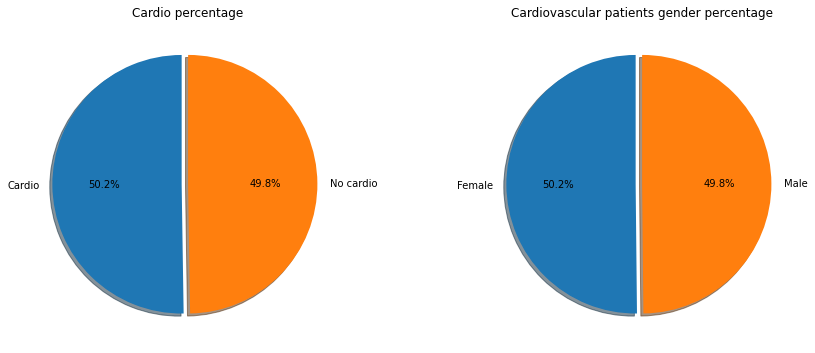

In [17]:
fig, ax = plt.subplots(1,2, figsize=(14,20))
plt.tight_layout(pad=10)
ax[0].pie(x=df['cardio'].value_counts(), labels=['Cardio', 'No cardio'],autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.05,0.0))
ax[0].title.set_text('Cardio percentage')
gender = df.query("cardio == 1").apply(lambda row: gender(row['female'], row['male']), axis=1).value_counts()
ax[1].pie(x=gender, labels=['Female', 'Male'],autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.05,0.0))
ax[1].title.set_text('Cardiovascular patients gender percentage')
;

''

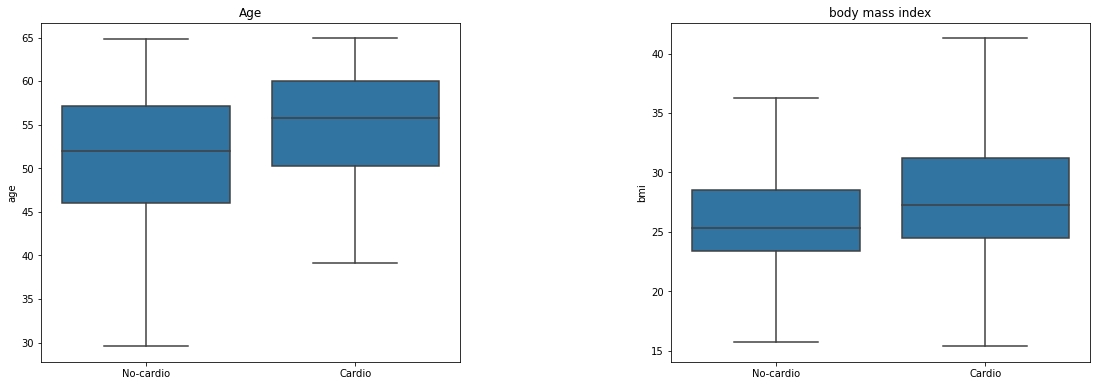

In [18]:
fig, ax = plt.subplots(ncols=2, figsize=(20,10))
plt.tight_layout(pad=18)
sb.boxplot(data=df, x='cardio', y='age', ax=ax[0], color=base_color)
sb.boxplot(data=df, x='cardio', y='bmi', showfliers=False, ax=ax[1], color=base_color)
ax[0].title.set_text('Age')
ax[0].set_xticklabels(['No-cardio', 'Cardio'])
ax[1].title.set_text('body mass index')
ax[1].set_xticklabels(['No-cardio', 'Cardio'])
ax[0].set_xlabel("")
ax[1].set_xlabel("")
;

''

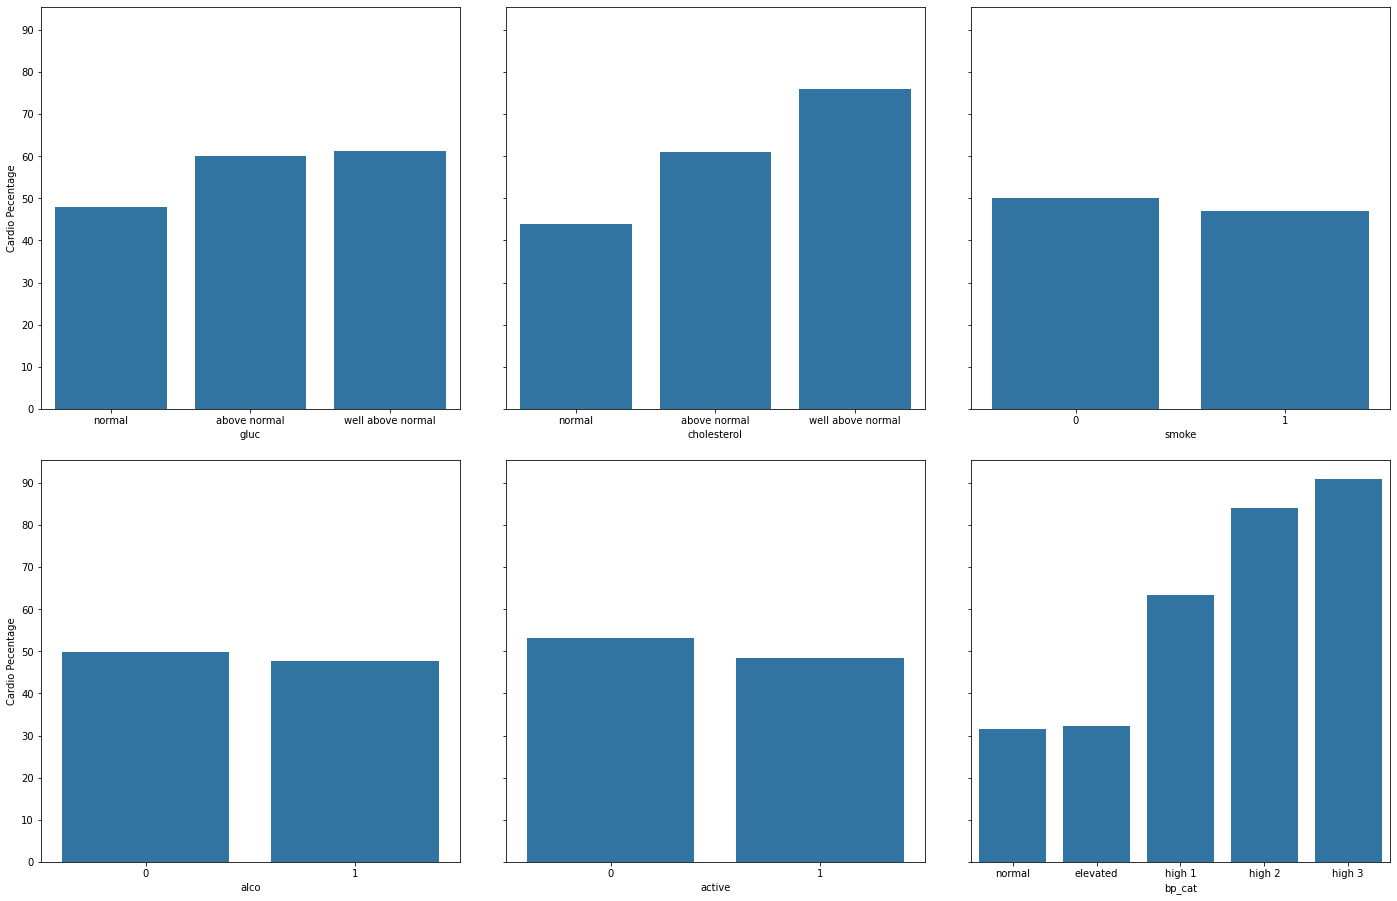

In [19]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20,13), sharey=True)
plt.tight_layout(pad=3)


df_gluc = df.groupby('gluc').mean()
sb.barplot(data=df_gluc, x=df_gluc.index, y='cardio', ax=ax[0][0], color=base_color)
ax[0][0].set_xticklabels(['normal', 'above normal', 'well above normal'])
ax[0][0].set_yticks(np.arange(0, 1.2, 0.1))
ax[0][0].set_yticklabels(np.arange(0, 120, 10))

df_cholesterol = df.groupby('cholesterol').mean()
sb.barplot(data=df_cholesterol, x=df_cholesterol.index, y='cardio', ax=ax[0][1], color=base_color)
ax[0][1].set_xticklabels(['normal', 'above normal', 'well above normal'])

df_smoke = df.groupby('smoke').mean()
sb.barplot(data=df_smoke, x=df_smoke.index, y='cardio', ax=ax[0][2], color=base_color)

df_alco = df.groupby('alco').mean()
sb.barplot(data=df_alco, x=df_alco.index, y='cardio', ax=ax[1][0], color=base_color)

df_active = df.groupby('active').mean()
sb.barplot(data=df_active, x=df_active.index, y='cardio', ax=ax[1][1], color=base_color)

df_bp = df.groupby('bp_cat').mean()
sb.barplot(data=df_bp, x=df_bp.index, y='cardio', ax=ax[1][2], color=base_color,
           order=['normal', 'elevated', 'high 1', 'high 2', 'high 3'])
plt.setp(ax[:, :], ylabel='')
plt.setp(ax[:, 0], ylabel='Cardio Pecentage')
;

Prob and Stats

In [20]:
df_age_50 = df.query('age >=50')
df_agy_50_cardio = df_age_50.query('cardio==1')
round(df_agy_50_cardio.shape[0]*100/df_age_50.shape[0],2)

55.63

In [21]:
df_bmi37 = df.query('bmi >=37')
df_bmi37_cardio = df_bmi37.query('cardio ==1')
round(df_bmi37_cardio.shape[0]*100/df_bmi37.shape[0],2)

70.17

In [22]:
df_high3 = df.query("bp_cat == 'high 3'")
df_high_cardio = df_high3.query('cardio == 1')
round(df_high_cardio.shape[0]*100/df_high3.shape[0],2)

90.91

In [23]:
df_cohol_smoke = df.query("alco==1 or smoke==1")
print(df_cohol_smoke.shape[0]*100/df.shape[0])

14.780523407361068


In [24]:
df_cohol_smoke_cadrio = df_cohol_smoke.query('cardio==1')
df_cohol_smoke_cadrio.shape[0]*100/df_cohol_smoke.shape[0]

47.95428893905192

In [25]:
df_not_active = df.query('active==0')
df_not_active_cardio = df_not_active.query('cardio==1')
df_not_active_cardio.shape[0]*100/df_not_active.shape[0]

53.28196769891836

4. Predicting using Machine Learning

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_predict, cross_validate
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve
from xgboost import plot_importance
import warnings
warnings.filterwarnings('ignore')

In [27]:
df.head()

,age,female,male,height,weight,bmi,ap_hi,ap_lo,bp_cat,cholesterol,gluc,smoke,alco,active,cardio,gender_updated
0,50.36,0,1,168,62.0,21.97,110,80,normal,1,1,0,0,1,0,0
1,55.38,1,0,156,85.0,34.93,140,90,high 2,3,1,0,0,1,1,1
2,51.63,1,0,165,64.0,23.51,130,70,high 1,3,1,0,0,0,1,1
3,48.25,0,1,169,82.0,28.71,150,100,high 2,1,1,0,0,1,1,0
4,47.84,1,0,156,56.0,23.01,100,60,normal,1,1,0,0,0,0,1


In [28]:
X = df.drop(['cardio', 'bp_cat'], axis=1)
y = df['cardio']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [30]:
#check for linearity
m9 = LinearRegression().fit(X, y)
r2_score(m9.predict(X), y)

-2.446397624201232

##### Attempted Neural Net

In [31]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [ ]:
# model.compile(optimizer='sgd',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# hist = model.fit(X_train, y_train, batch_size=32, epochs=100)

4.1 Random Forest Model

In [32]:
random_model = RandomForestClassifier(n_estimators=51,
                          max_depth=10,
                          random_state=0)

random_model.fit(X_train, y_train)
print(f"Testing accuracy: {round(accuracy_score(random_model.predict(X_test), y_test),4)*100}%")
print(f"Average testing accuracy: {round(cross_validate(random_model, X, y, cv=5)['test_score'].mean()*100,2)}%")

Testing accuracy: 73.61%
Average testing accuracy: 73.24%


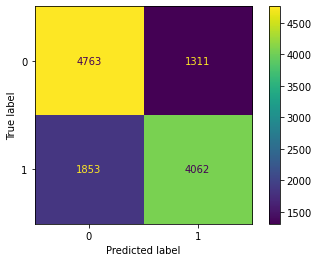

In [33]:
plot_confusion_matrix(random_model, X_test, y_test, values_format='d')

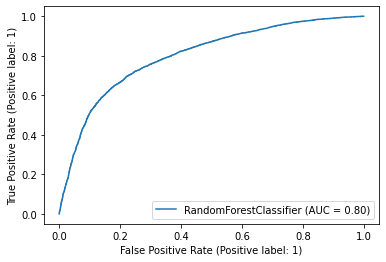

In [34]:
plot_roc_curve(random_model, X_test, y_test)

In [35]:
!pip install shap

CPU times: user 0 ns, sys: 4 µs, total: 4 µs
Wall time: 7.87 µs


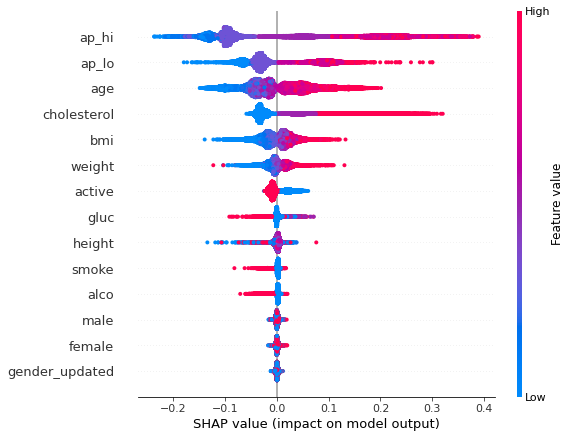

In [36]:
# SHAP for Random Forest Classifier
import shap
shap.initjs()

# Let us have a look on SHAP summary plot
%time
samples = X_train

explainer = shap.TreeExplainer(random_model)
shap_values = explainer.shap_values(samples, approximate=False, check_additivity=False)

shap.summary_plot(shap_values[1], samples)

In [ ]:
##import pandas as pd 
#!pip install probatus 
#from probatus.interpret import ShapModelInterpreter
#X = pd.DataFrame(df)
#shap_interpreter = ShapModelInterpreter(random_model)
#ax = shap_interpreter.plot('summary')
#shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])
#shap.force_plot(explainer.expected_value, shap_values, X)

4.2 K Neighbors Model 

In [40]:
# Creating and Training K-Neighbors model 
kparams = {'n_neighbors':[10],
           'leaf_size':[1],
           'weights':['uniform'],
           'algorithm':['ball_tree']}


In [41]:
krsv = RandomizedSearchCV(KNeighborsClassifier(),
                               param_distributions = kparams,
                               n_iter = 10,
                               cv = 5, verbose=3,
                               random_state=0,
                               n_jobs = 7)

In [ ]:
krsv.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=7,
                   param_distributions={'algorithm': ['ball_tree'],
                                        'leaf_size': [1], 'n_neighbors': [10],
                                        'weights': ['uniform']},
                   random_state=0, verbose=3)

In [ ]:
krsv.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 1,
 'n_neighbors': 10,
 'weights': 'uniform'}

In [ ]:
k_model = KNeighborsClassifier(weights = 'uniform',
                               n_neighbors = 10,
                               leaf_size = 1,
                               algorithm = 'ball_tree')
k_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, n_neighbors=10)

In [ ]:
cross_validate(k_model, X, y, cv=5)['test_score'].mean()

0.7022208320300282

score: 69.91%


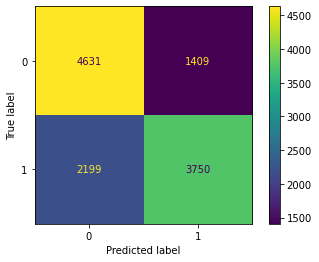

In [ ]:
# After training model, we need to predit values 
k_pred = k_model.predict(X_test)
print(f"score: {round((accuracy_score(k_pred, y_test)*100),2)}%")
plot_confusion_matrix(k_model, X_test, y_test, values_format='d')

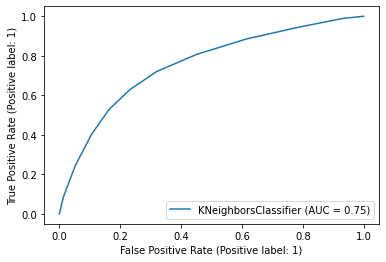

In [ ]:
plot_roc_curve(k_model, X_test, y_test)

In [ ]:
#SHAP for K-Neighbors Classifier
import shap
shap.initjs()

# Let us have a look on SHAP summary plot
%time
samples = X_train

explainer = shap.KernelExplainer(k_model.predict_proba, X_train)
shap_values = explainer.shap_values(samples, approximate=False, check_additivity=False)

shap.summary_plot(shap_values[1], samples)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.06 µs


Using 35966 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/35966 [00:00<?, ?it/s]

4.3 X Gradient Boost

In [37]:
# Creating and Training the Model 
# ROUND 1
param_grid = {
     'max_depth': [3, 4, 5],
     'learning_rate': [0.1, 0.01, 0.05],
     'gamma': [0, 0.25, 0.1],
     'reg_lambda': [0, 1.0, 10.0],
     'scale_pos_weight': [1, 3, 5]
 }

# ROUND 2
param_grid = {
     'max_depth': [3],
     'learning_rate': [0.6, 0.5, 0.7],
     'gamma': [0.25],
     'reg_lambda': [50.0, 100, 150],
     'scale_pos_weight': [3]
 }

# ROUND 3
param_grid = {
     'max_depth': [3],
     'learning_rate': [0.6, 0.5, 0.7],
     'gamma': [0.25],
     'reg_lambda': [50.0, 100, 150],
     'scale_pos_weight': [3]
 }

# ROUND 4  
param_grid = {
     'max_depth': [3],
     'learning_rate': [0.6, 0.65, 0.55],
     'gamma': [0.25],
     'reg_lambda': [40.0, 50.0, 60.0],
     'scale_pos_weight': [3]
 }

# Best Model
param_grid = {'gamma': [0.24],
  'learning_rate': [.13],
  'max_depth': [5],
  'reg_lambda': [50],
     'n_estimators': [150]
}

In [38]:
optimal_params = GridSearchCV(
     estimator=XGBClassifier(objective="binary:logistic",
                             seed=0,
                             subsample=0.9),
     param_grid=param_grid,
     scoring='roc_auc',
     verbose=1,
     n_jobs=7,
     cv=5
 )

In [39]:
optimal_params.fit(
                 X_train, 
                 y_train, 
                 verbose=False,
                 early_stopping_rounds=10,
                 eval_metric='aucpr',
                 eval_set=[(X_test, y_test)])

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=XGBClassifier(seed=0, subsample=0.9), n_jobs=7,
             param_grid={'gamma': [0.24], 'learning_rate': [0.13],
                         'max_depth': [5], 'n_estimators': [150],
                         'reg_lambda': [50]},
             scoring='roc_auc', verbose=1)

In [ ]:
optimal_params.best_params_

{'gamma': 0.24,
 'learning_rate': 0.13,
 'max_depth': 5,
 'n_estimators': 150,
 'reg_lambda': 50}

In [ ]:
boost_model = XGBClassifier(verbosity=0, seed=0, n_estimators=150,
                            gamma= 0.24, max_depth=4, learning_rate=0.13,
                            reg_lambda=50.0, scale_pos_weight=1)

boost_model.fit(X_train, y_train)
boost_pred = boost_model.predict(X_test)
print(f"Testing accuracy: {round((accuracy_score(boost_pred, y_test)*100),2)}%")
xgb_cross = cross_validate(boost_model, X, y, cv=11)
print(f"Average testing accuracy: {round((xgb_cross['test_score'].mean()*100),4)}%")

Testing accuracy: 73.25%
Average testing accuracy: 73.3896%


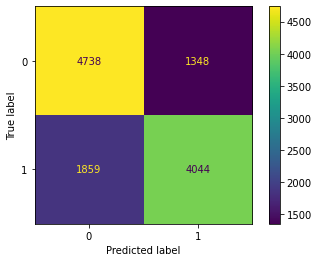

In [ ]:
# Predicting new values 
plot_confusion_matrix(boost_model, X_test, y_test, values_format='d')

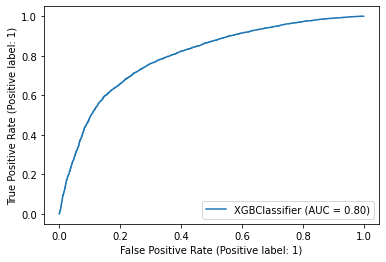

In [ ]:
plot_roc_curve(boost_model, X_test, y_test)

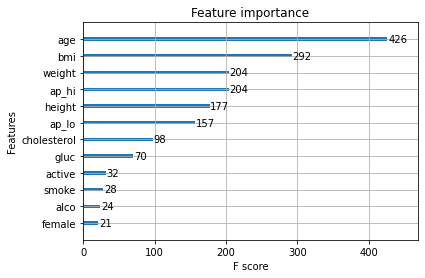

In [ ]:
plot_importance(boost_model)

4.4 Support Vector Model

In [ ]:
# Creating a model and training it 
svc_param_grid = {'C': [100,150],'gamma': [0.00001, 0.000001],'kernel': ['rbf']}  
grid = GridSearchCV(SVC(), svc_param_grid, refit = True, verbose = 0) 
# fitting the model for grid search 
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
svc_model = SVC(C=100, gamma=0.00001, kernel="rbf", random_state=42)
svc_cv = cross_validate(svc_model, X, y, cv=5)
svc_cv

In [ ]:
# Using trained model in order to provide a prediction for new values 
svc_cv['test_score'].mean()

In [ ]:
svc_model.fit(X_train, y_train)
csv_pred = svc_model.predict(X_train)
print(csv_pred)